<a href="https://colab.research.google.com/github/vishaljbind/CVIP-Projects-Phase-2/blob/main/Climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Data Analysis

**CodersCave**

#### Task:-

- Undertake a comprehensive climate data analysis project to explore and understand historical climate patterns and trends. The objective is to derive valuable insights from climate data, enabling a better understanding of weather conditions over time.

### Importing necessary libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Loading and Exploring the Dataset

In [2]:
df = pd.read_csv('climate_change_data.csv')
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

In [4]:
df.set_index('Date', inplace=True)
df.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Month
Date,,,,,,,,,
2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,January
2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,January
2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,January
2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,January
2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,January


In [5]:
df.shape

(6316, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6316 entries, 2000-01-01 00:00:00 to 2014-07-11 03:07:56.327632704
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        6316 non-null   object 
 1   Country         6316 non-null   object 
 2   Temperature     6316 non-null   float64
 3   CO2 Emissions   6316 non-null   float64
 4   Sea Level Rise  6316 non-null   float64
 5   Precipitation   6316 non-null   float64
 6   Humidity        6315 non-null   float64
 7   Wind Speed      6315 non-null   float64
 8   Month           6316 non-null   object 
dtypes: float64(6), object(3)
memory usage: 493.4+ KB


In [7]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,6316.000000,6316.000000,6316.000000,6316.000000,6315.000000,6315.000000
mean,14.956023,400.579379,-0.005849,49.962583,49.689127,25.151497
std,5.023032,49.455345,0.982396,28.886680,28.842676,14.498336
min,-3.709565,226.370250,-4.092155,0.010143,0.024785,0.004526
25%,11.620018,368.064094,-0.666144,24.630085,24.604637,12.560347
50%,14.999352,401.419248,0.001157,49.587466,49.763020,24.990789
75%,18.314748,432.979100,0.669144,74.703040,74.677746,37.834119
max,33.976956,582.899701,3.626814,99.991900,99.959665,49.983894


In [8]:
df.describe(include=object)

,Location,Country,Month
count,6316,6316,6316
unique,5271,243,12
top,North David,Congo,January
freq,9,55,554


In [9]:
df.isnull().sum()

Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          1
Wind Speed        1
Month             0
dtype: int64

In [10]:
df.columns

Index(['Location', 'Country', 'Temperature', 'CO2 Emissions', 'Sea Level Rise',
       'Precipitation', 'Humidity', 'Wind Speed', 'Month'],
      dtype='object')

In [11]:
df.nunique()

Location          5271
Country            243
Temperature       6316
CO2 Emissions     6316
Sea Level Rise    6316
Precipitation     6316
Humidity          6315
Wind Speed        6315
Month               12
dtype: int64

### Data Visualization

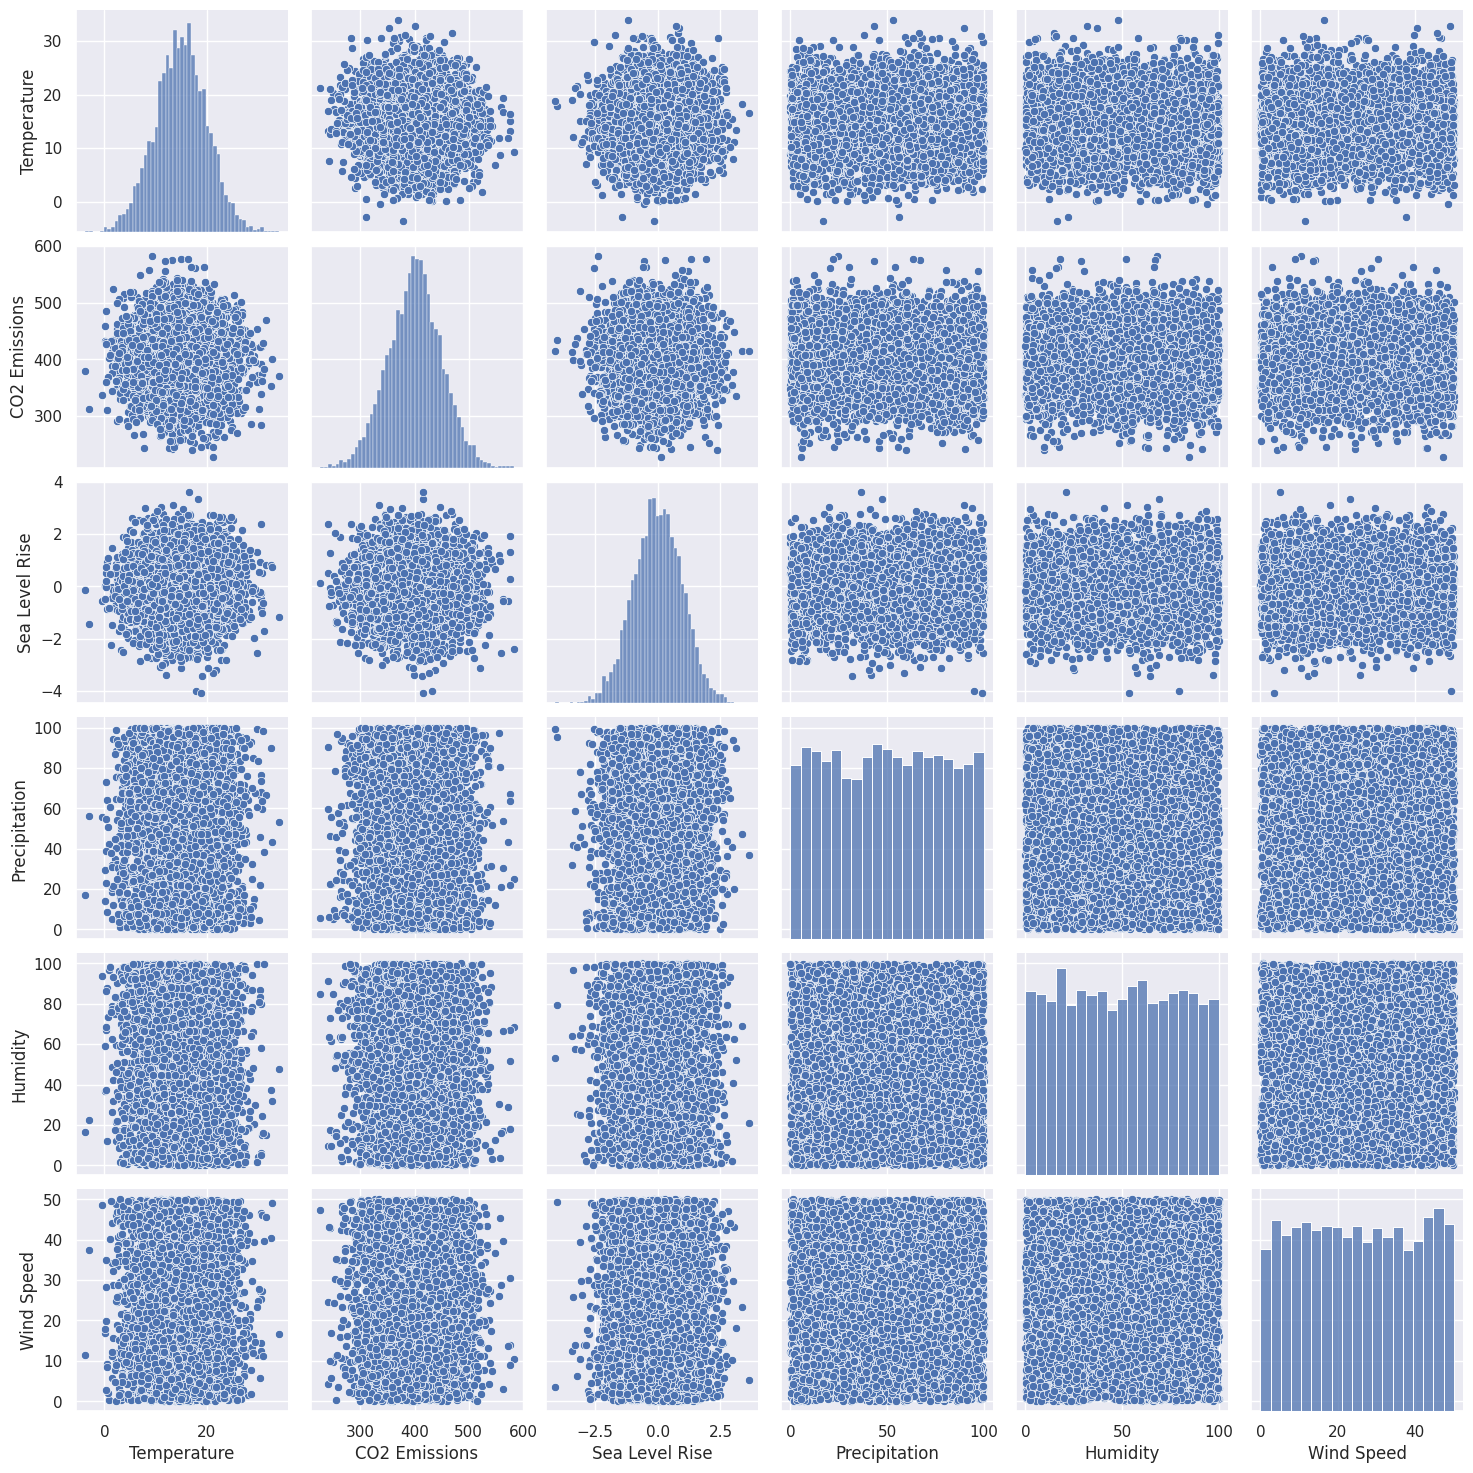

In [12]:
sns.pairplot(df)

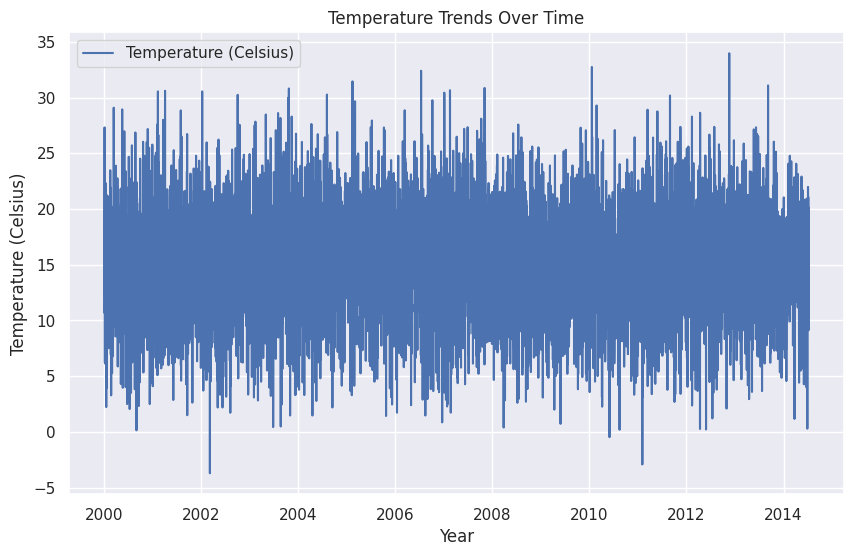

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['Temperature'], label='Temperature (Celsius)')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.show()

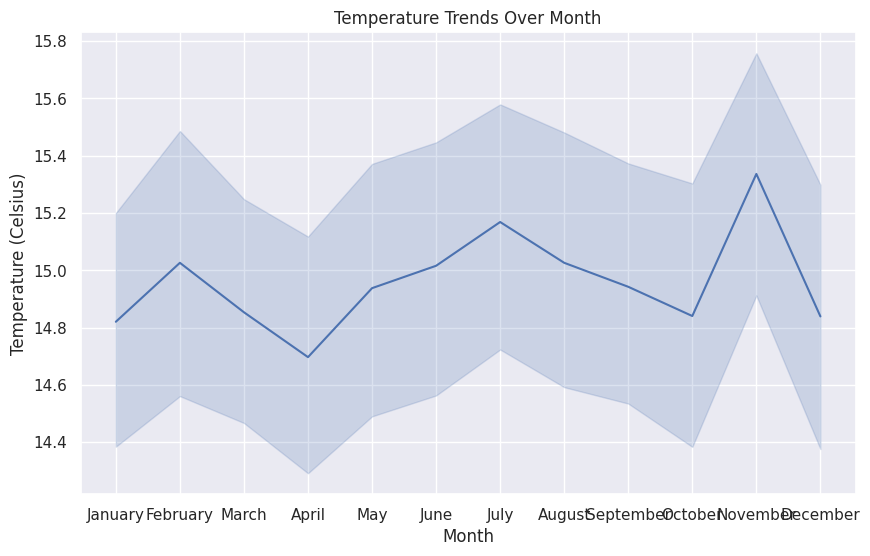

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Month'], y=df['Temperature'])
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Trends Over Month')
plt.show()

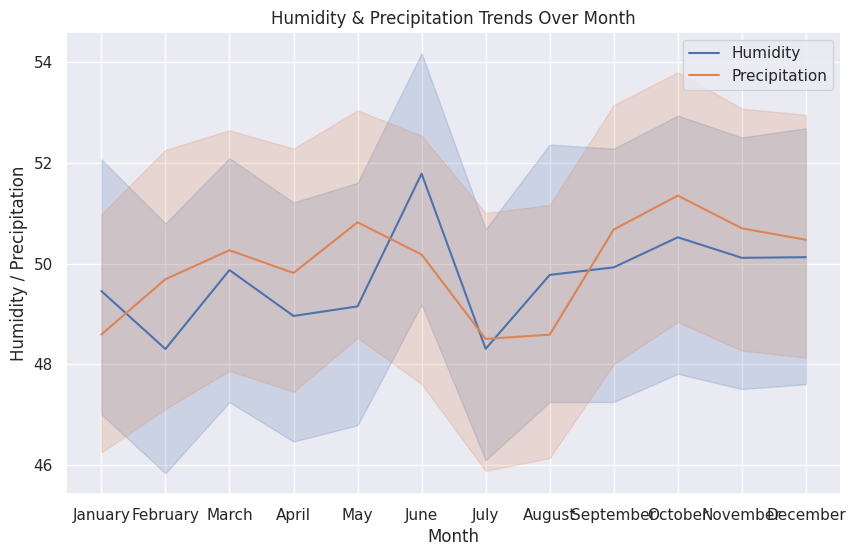

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.Month, y=df['Humidity'], label='Humidity')
sns.lineplot(x=df.Month, y=df['Precipitation'], label='Precipitation')

plt.xlabel('Month')
plt.ylabel('Humidity / Precipitation')
plt.title('Humidity & Precipitation Trends Over Month')
plt.show()

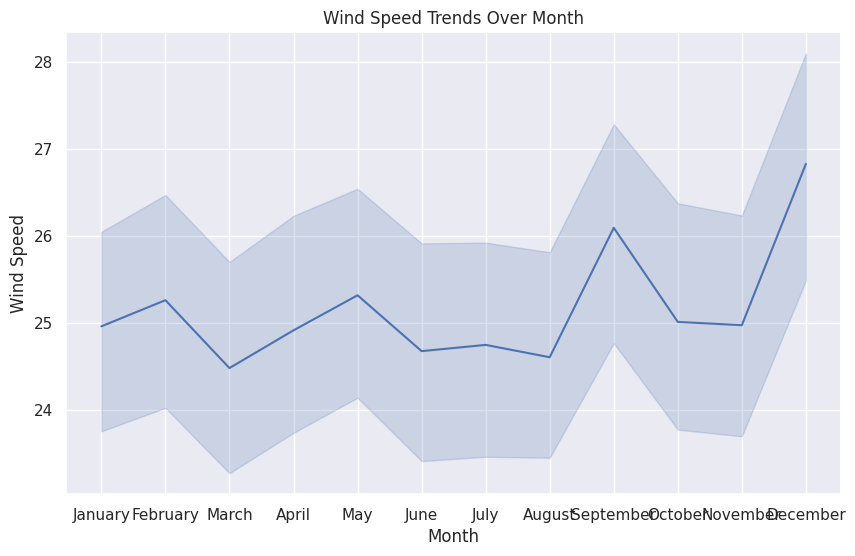

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.Month, y=df['Wind Speed'])
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Trends Over Month')
plt.show()

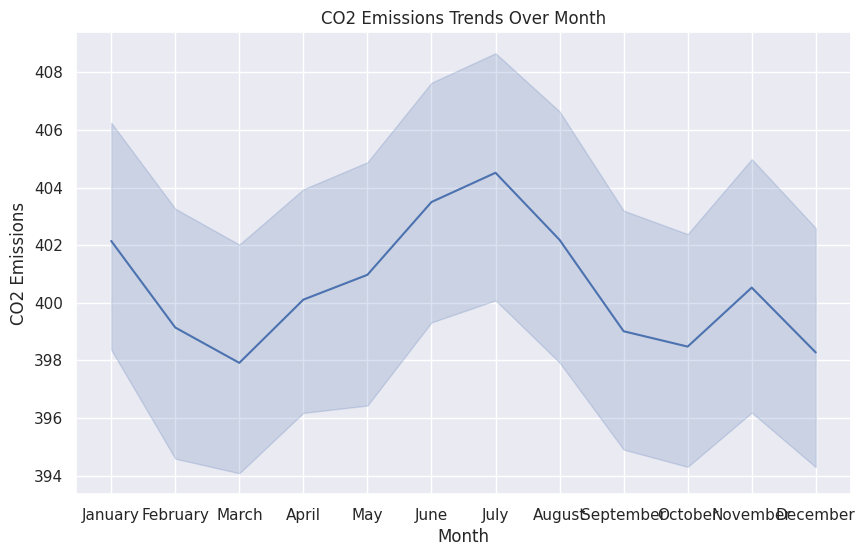

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.Month, y=df['CO2 Emissions'])
plt.xlabel('Month')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Trends Over Month')
plt.show()

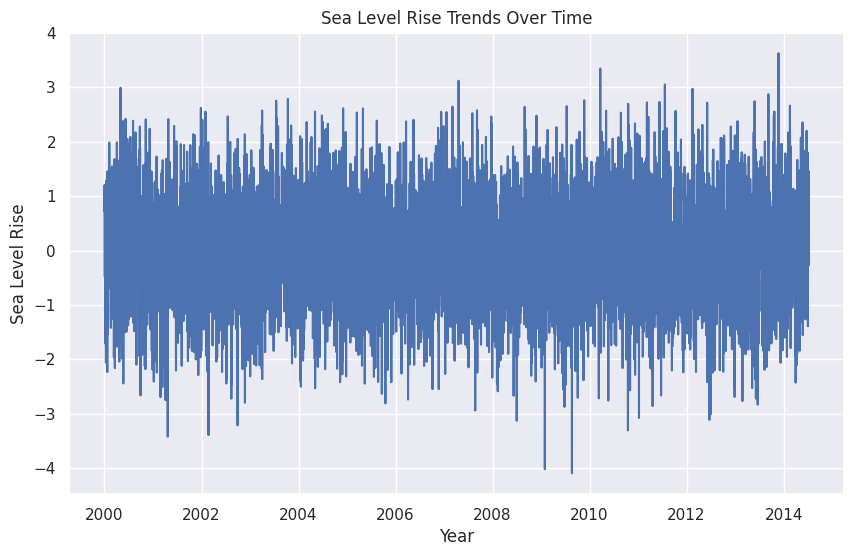

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Sea Level Rise'])
plt.xlabel('Year')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise Trends Over Time')
plt.show()

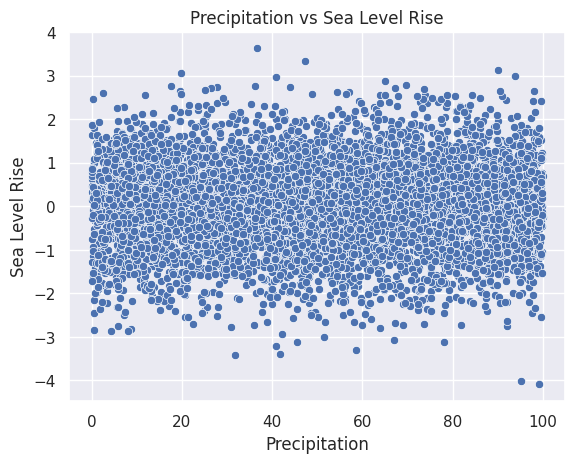

In [19]:
sns.scatterplot(x='Precipitation', y='Sea Level Rise', data=df)
plt.title('Precipitation vs Sea Level Rise')
plt.xlabel('Precipitation')
plt.ylabel('Sea Level Rise')
plt.show()

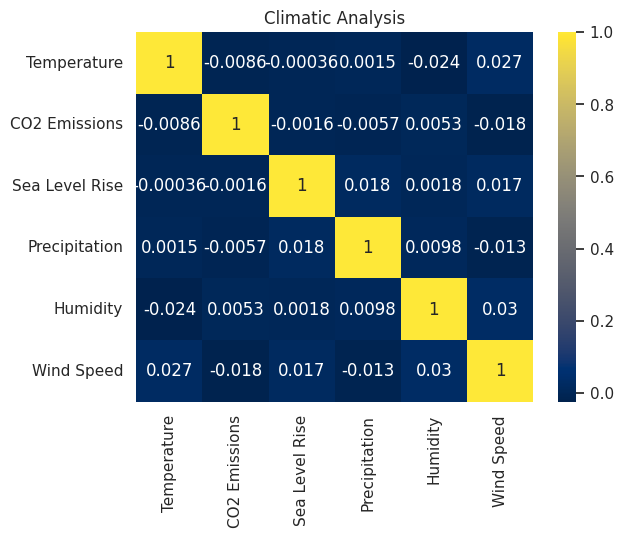

In [20]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='cividis')
plt.title('Climatic Analysis')
plt.show()

### Data Preprocessing

In [56]:
X = df[['Precipitation', 'Humidity', 'Wind Speed']]
y = df[['Temperature']]

In [57]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training the Model
- After training the model, the model can be able to predict the temperature according to the given climatic features (i.e., CO2 emissions, sea level rise, precipitation, wind speed, humidity, etc.)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
model.fit(x_train, y_train)

LinearRegression()

In [52]:
len(x_train), len(y_train)

(5052, 5052)

In [49]:
len(x_test), len(y_test)

(1264, 1264)

In [58]:
print('Accuracy of the model: ', model.score(x_test, y_test))

Accuracy of the model:  -0.00056772089610857


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(x_test)

In [60]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.159175231596208


In [61]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 27.024221116518813


In [62]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 5.198482578264431


In [63]:
actual_predict= pd.DataFrame({
    'Actual values': y_test.values.flatten(),
    'Predicted values': y_pred.flatten()})
actual_predict.head()

,Actual values,Predicted values
0,8.944182,14.968750
1,8.156720,15.281392
2,18.768844,14.815586
3,13.434657,14.656712
4,17.634981,14.908079
